<a href="https://colab.research.google.com/github/sahana-roy/MBD-Work/blob/main/Prediction%20Model_Bank%20Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
import seaborn as sns
#K-Means
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#Bagging
from sklearn.ensemble import RandomForestClassifier
#XGBoost
#from xgboost import XGBClassifier
#!pip install hyperopt
#from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn import model_selection
from sklearn.metrics import classification_report
import pickle

#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
!pip install binclass-tools
import bctools as bc #https://github.com/lucazav/binclass-tools

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['bank.csv']))

In [ ]:
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [ ]:
#Gettting the data types of the columns
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_file("bank_profile.html")

In [ ]:
#Optional: Render Pandas Profiling Report
#profile.to_widgets()

In [ ]:
bank = df.copy()

# **Exploratory Data Analysis**

- Find unwanted columns 
- Find missing values
- Find Features with one values 
- Explore the Categorical features
- Find Categorical feature Distribution 
- Relationship Between Categorical Feature and LAbel 
- Explore the numerical Features
- Find discrete Numerical Features 
- Relationship between Discrete numerical Features an dlabels 
- Find continous Numerical Features 
- Distribution of continuous Numerical features 
- Relation Between Continuous numerical feature and labels 
- Find outliers in numerical Features 
- Explore the correlation between numerical features 
- Find Pair Plot 
- Check the data set is balanced or not based on target values in classification 

In [ ]:
# get the number of rows and columns 
bank.shape

(11162, 17)

In [ ]:
# get the description of the data 
bank.describe()

age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  
max      854.000000     58.000000

In [ ]:
# get the unique values from categorical columns
for x in bank.columns:
    if bank[x].dtype == 'object':
        print(f'{x} : {bank[x].unique()}')

job : ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital : ['married' 'single' 'divorced']
education : ['secondary' 'tertiary' 'primary' 'unknown']
default : ['no' 'yes']
housing : ['yes' 'no']
loan : ['no' 'yes']
contact : ['unknown' 'cellular' 'telephone']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome : ['unknown' 'other' 'failure' 'success']
deposit : ['yes' 'no']


In [ ]:
# find missing values 
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
# find features with 1 value 
bank.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [ ]:
# explore categorical feature 

categorical_features = [feature for feature in bank.columns if bank[feature].dtype == 'O']
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'deposit']

In [ ]:
# remove deposit column from categorical features
categorical_features.remove('deposit')

In [ ]:
categorical_features = bank[categorical_features]
categorical_features.nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

Ther are 9 categorical features 
Jobs and month has the highst one 

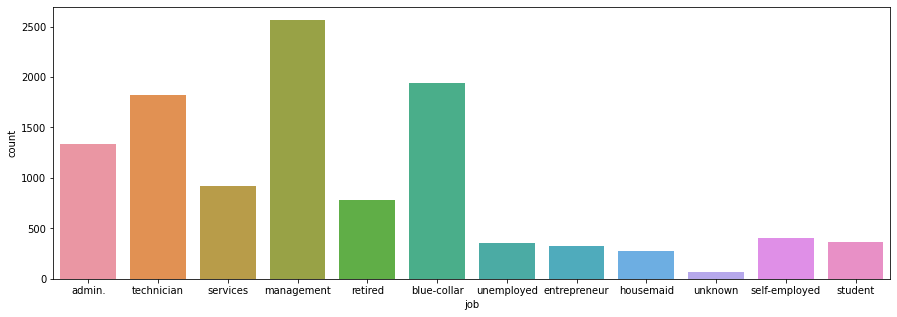

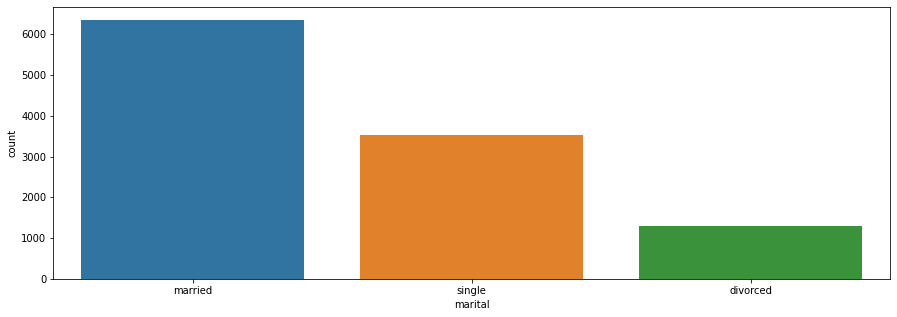

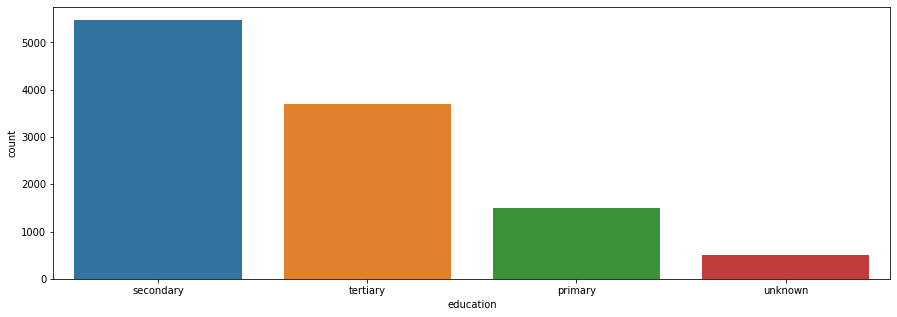

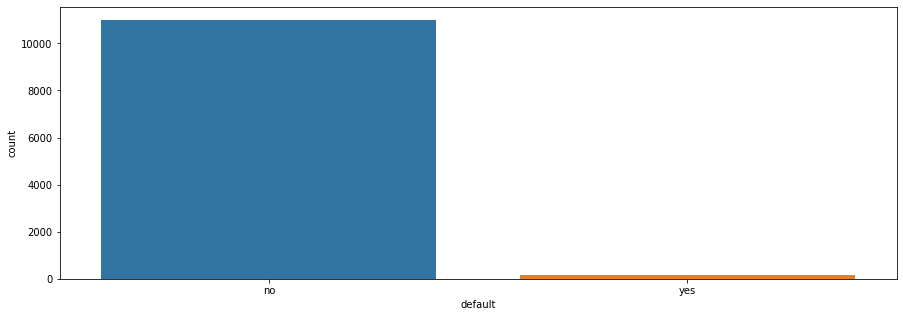

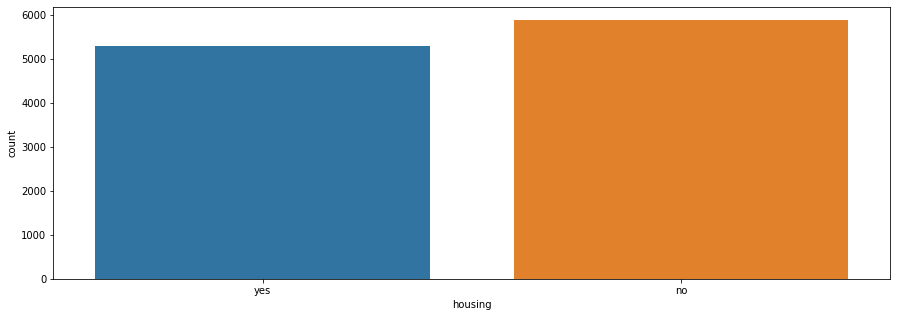

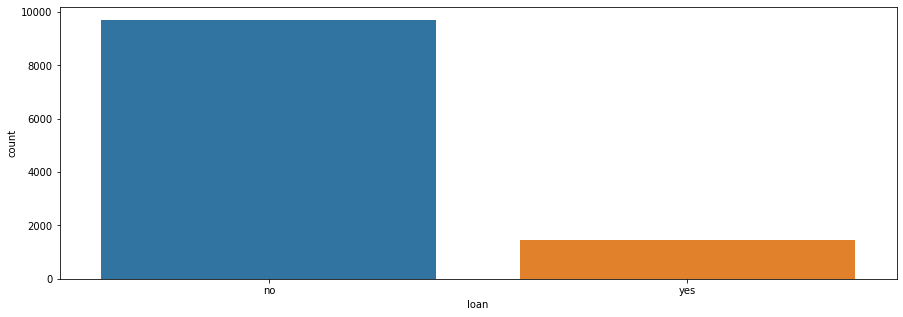

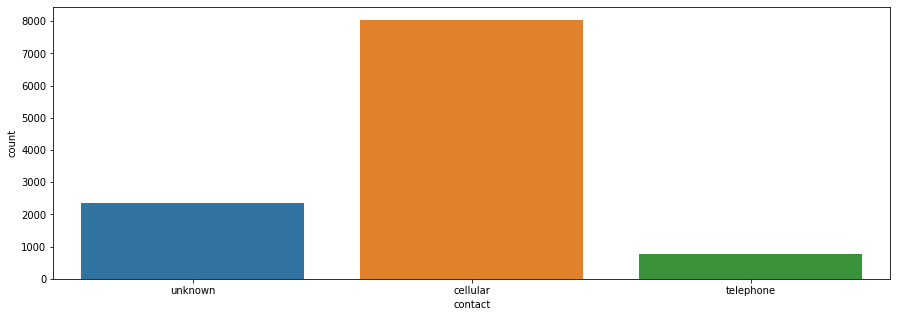

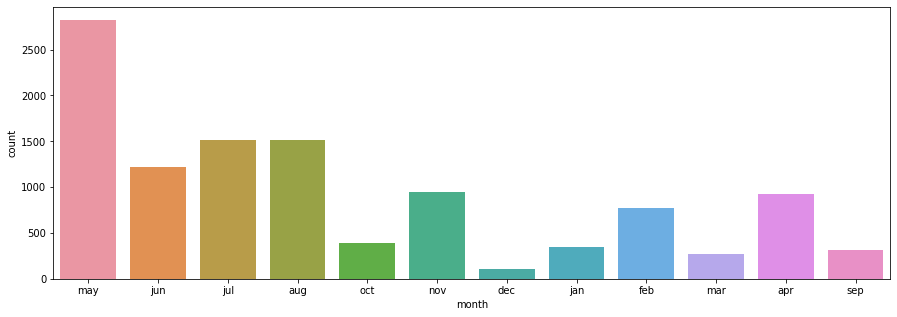

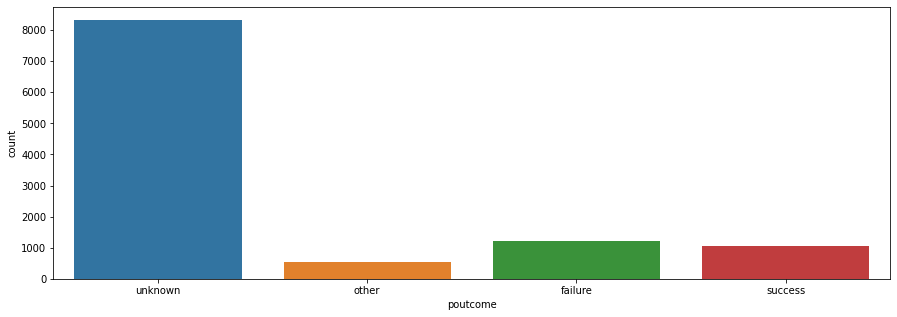

In [ ]:
# plot the count of categorical features
for feature in categorical_features:
    plt.figure(figsize=(15,5))
    sns.countplot(bank[feature])
    plt.show()

- There are a lot of management, blue collars and technicians 
- Half are maried and the other half are single or divorced 
- A lot don't have a loan 
- Most of them have a cellular contact or phone 
- May is the month with the highest records and the lowest is December 
- We don't have a lot of information about the putcome 


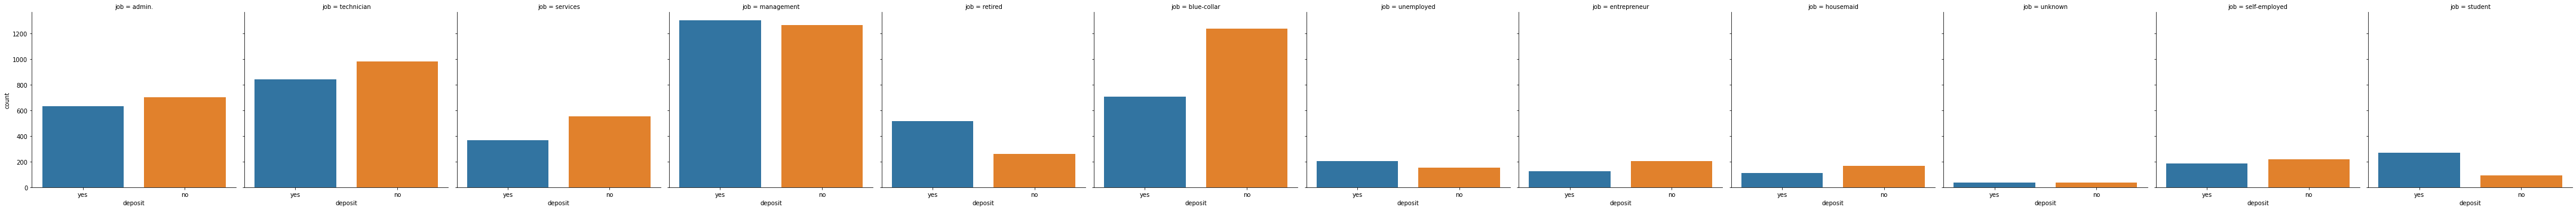

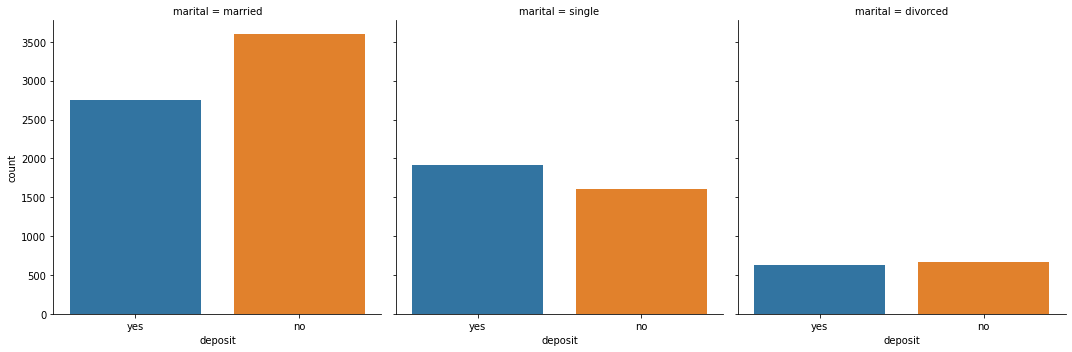

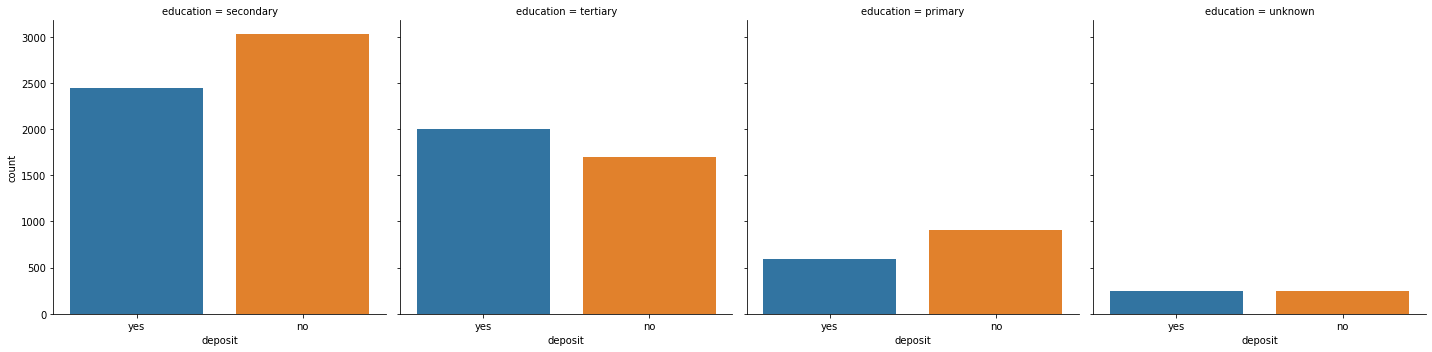

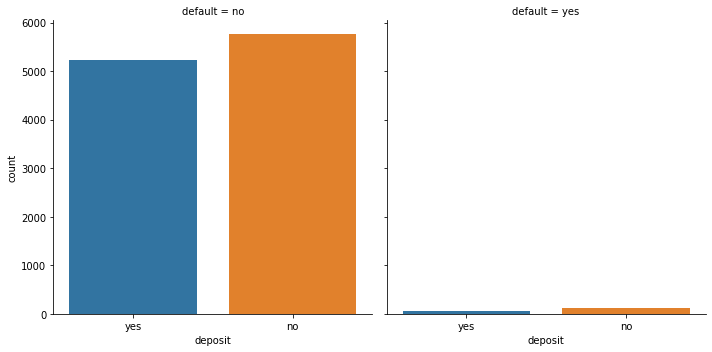

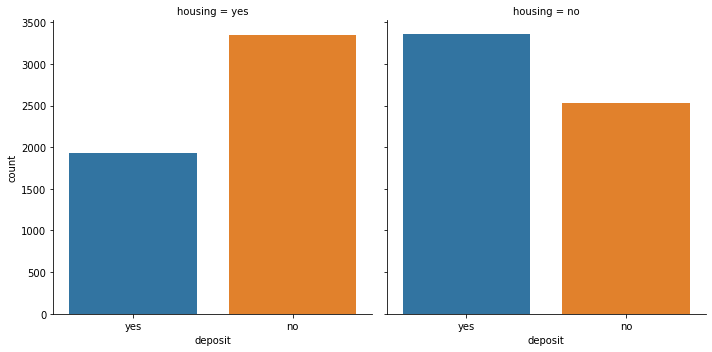

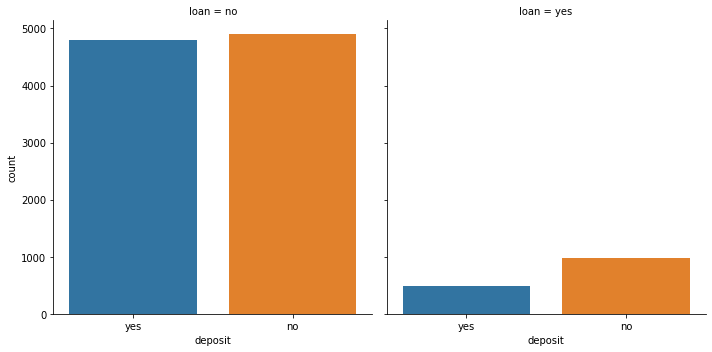

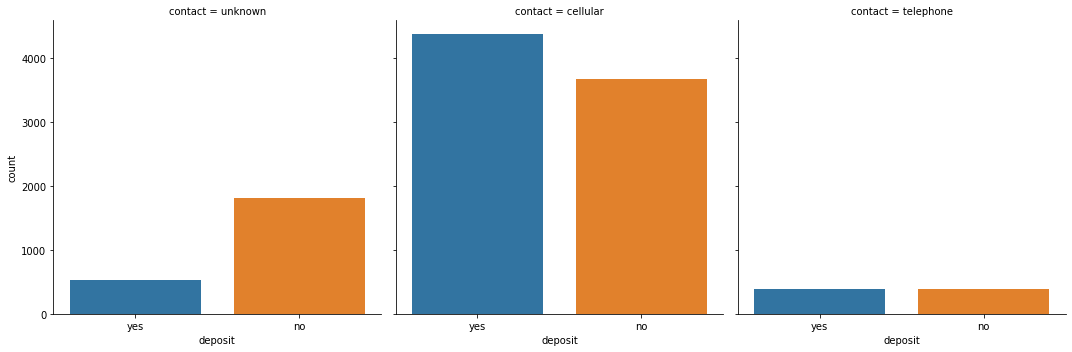

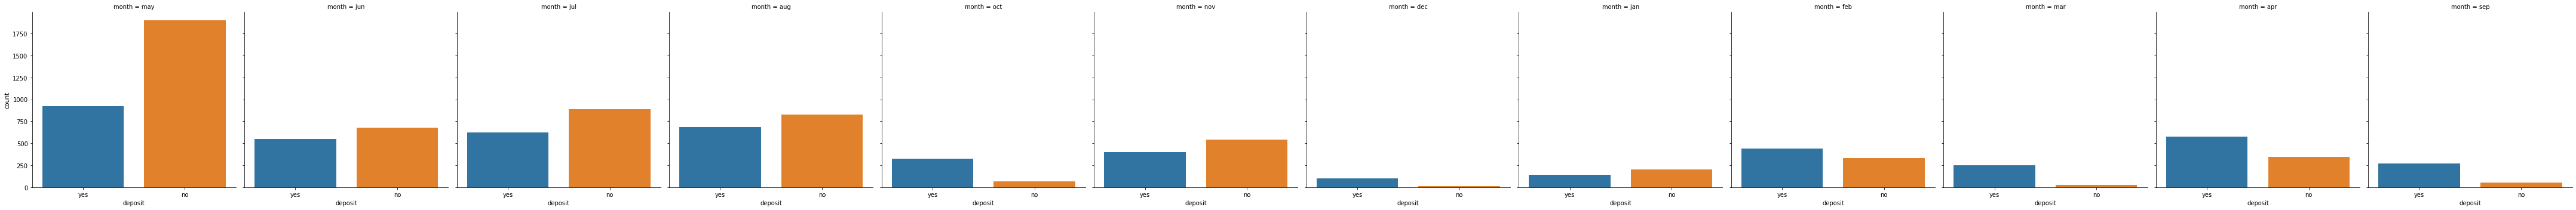

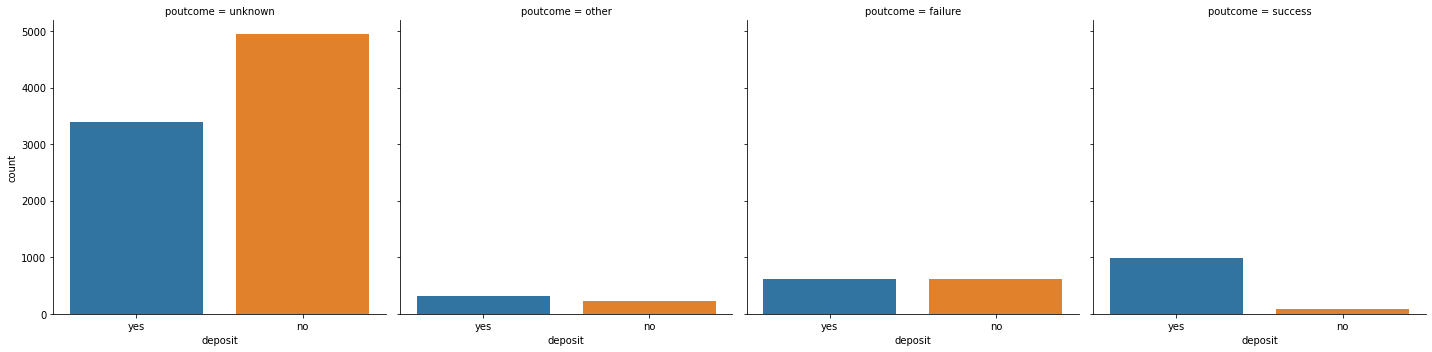

In [ ]:
# relationships between categorical features and labels
for categorical_feature in categorical_features:
    sns.catplot(x='deposit', col=categorical_feature, kind='count', data= bank)
plt.show()

In [ ]:
# check target label split over categorical features and find the count 
for categorical_feature in categorical_features:
    print(bank.groupby(['deposit',categorical_feature]).size())

deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           262
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            36
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           516
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            34
dtype: int64
deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64
deposit  education
no       prima

- Job Management has the highest deposit, blue collar don't like to put a deposit, whereas retired like deposit
- Client who has a housing loan seems not to be interested by deposit
- a lot of people don't put a deposit in May, whereas in March, September, October an December they show a high interest in deposit 

In [ ]:
# explore the numerical features 
numerical_features = [feature for feature in bank.columns if bank[feature].dtype != 'O']
numerical_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
numerical_features = bank[numerical_features]
numerical_features.head()

age  balance  day  duration  campaign  pdays  previous
0   59     2343    5      1042         1     -1         0
1   56       45    5      1467         1     -1         0
2   41     1270    5      1389         1     -1         0
3   55     2476    5       579         1     -1         0
4   54      184    5       673         2     -1         0

In [ ]:
# find discrete numerical features
discrete_features = [feature for feature in numerical_features if len(bank[feature].unique()) < 25] 
discrete_features

[]

There aren't any discrete numerical features 

In [ ]:
# find continuous numerical features
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
continuous_features

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
continuous_features= bank[continuous_features]
continuous_features.head()

age  balance  day  duration  campaign  pdays  previous
0   59     2343    5      1042         1     -1         0
1   56       45    5      1467         1     -1         0
2   41     1270    5      1389         1     -1         0
3   55     2476    5       579         1     -1         0
4   54      184    5       673         2     -1         0

There are 7 continuous features 

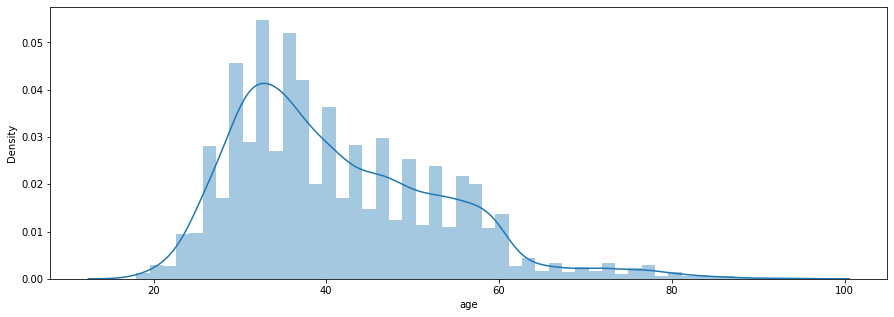

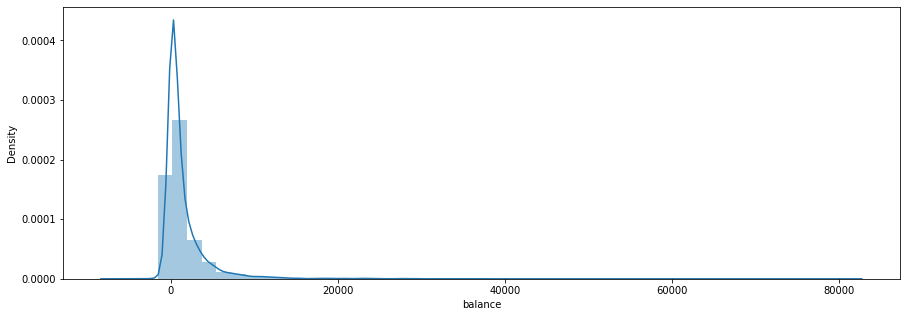

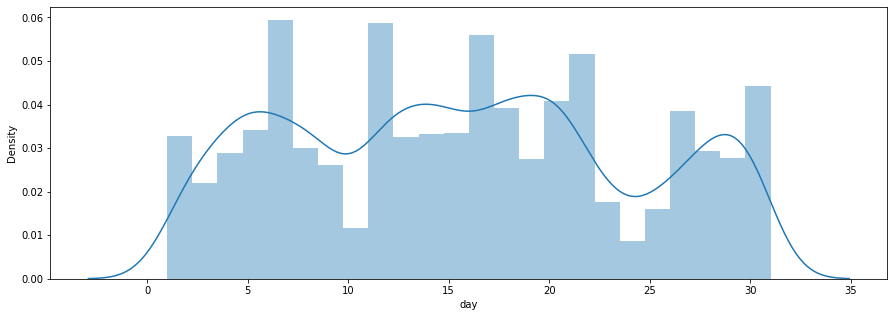

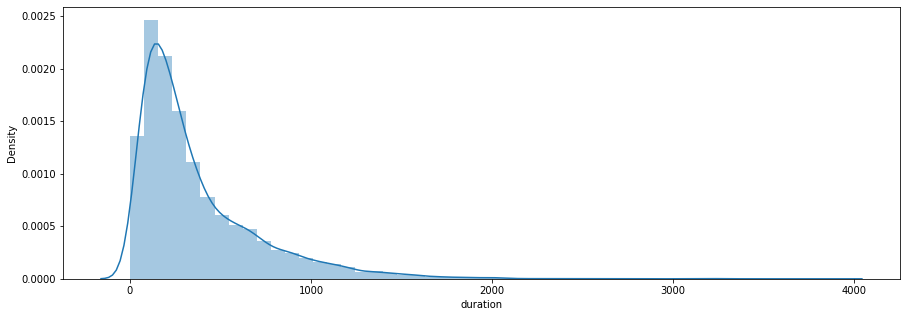

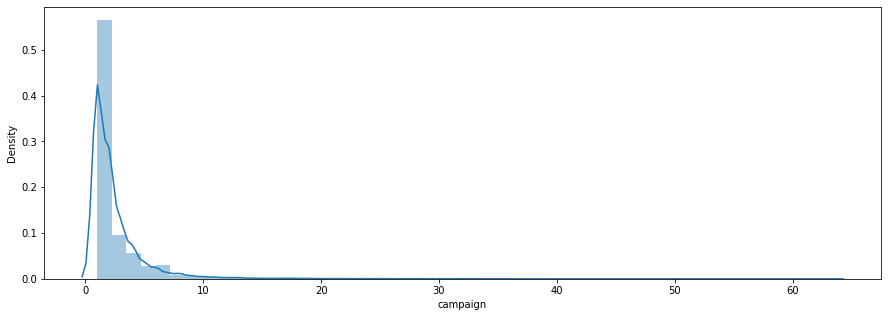

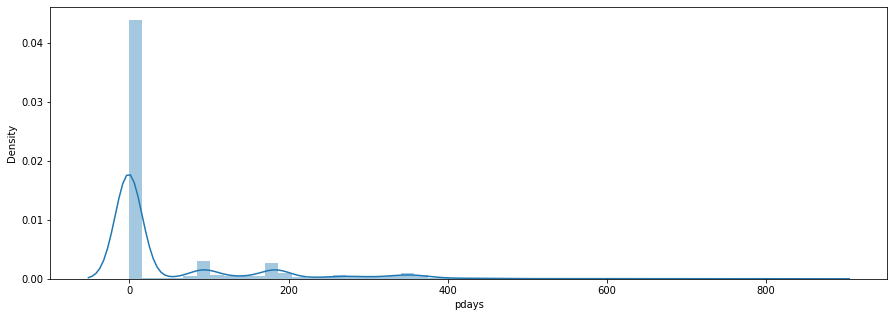

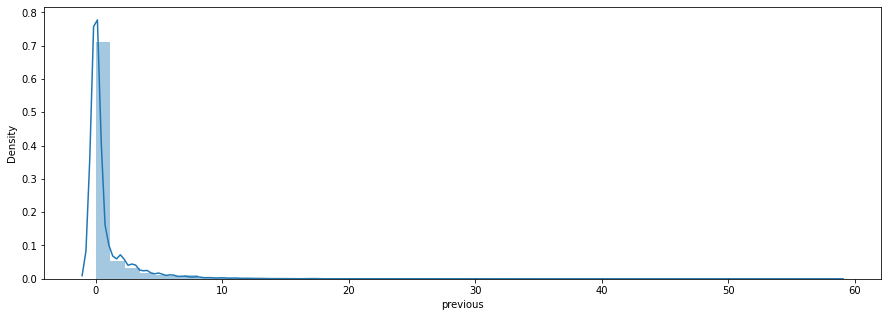

In [ ]:
# plot the distribution of continuous features
for feature in continuous_features:
    plt.figure(figsize=(15,5))
    sns.distplot(bank[feature])
    plt.show()


There seems to be outliers on balance, duration, campaign, days, and previous

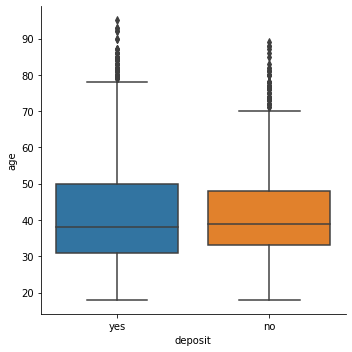

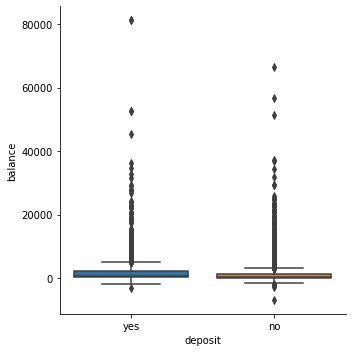

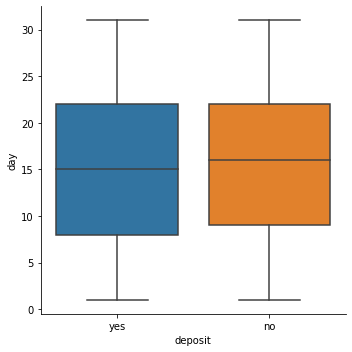

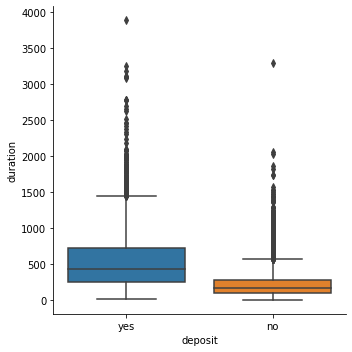

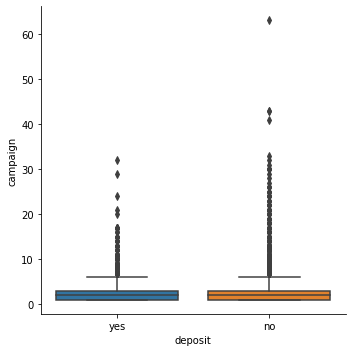

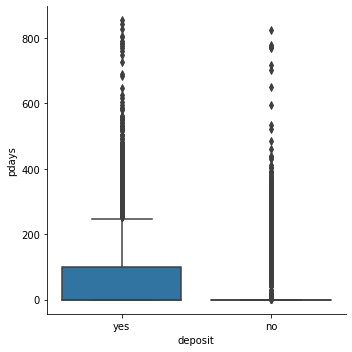

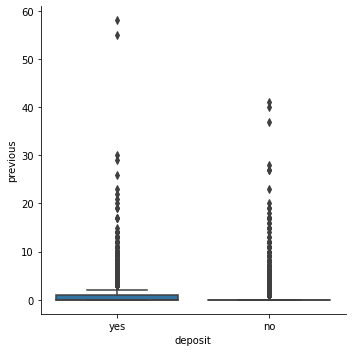

In [ ]:
# Relationship between continous features and labels

for feature in continuous_features:
   sns.catplot(x='deposit', y=feature, kind='box', data=bank)
plt.show()

The longer is the talk, the more there are deposit

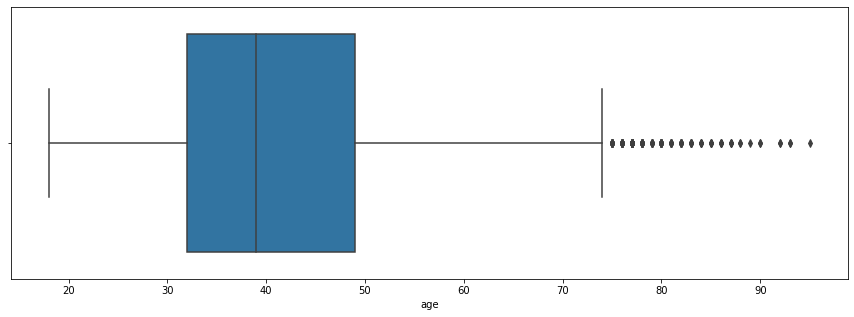

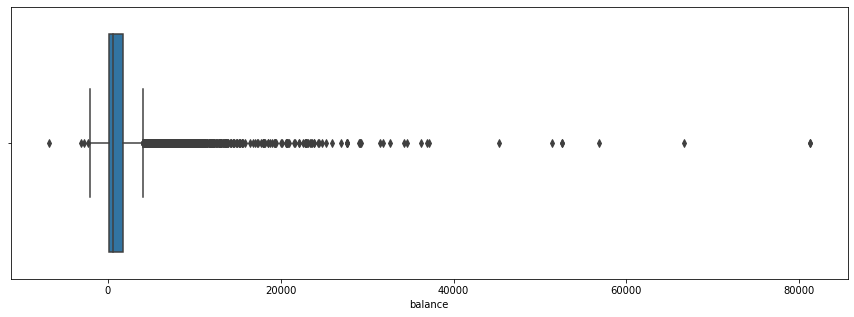

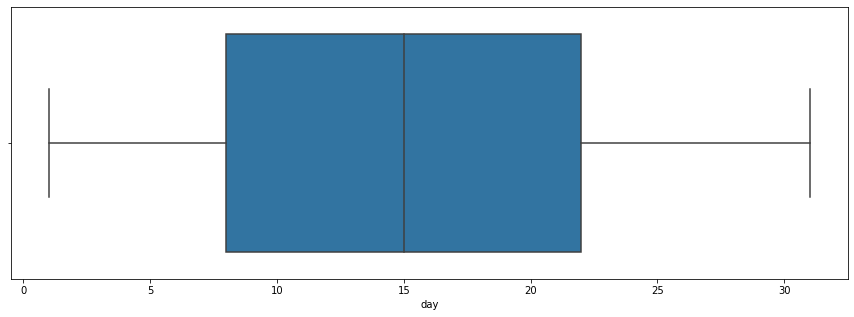

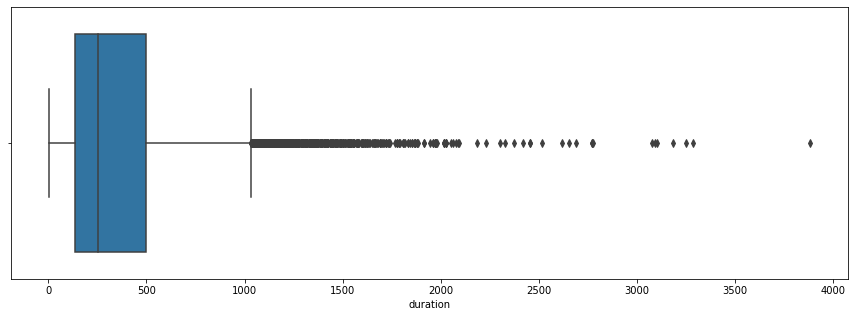

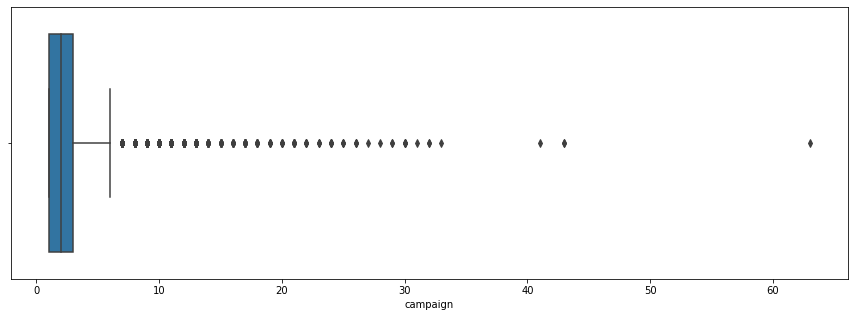

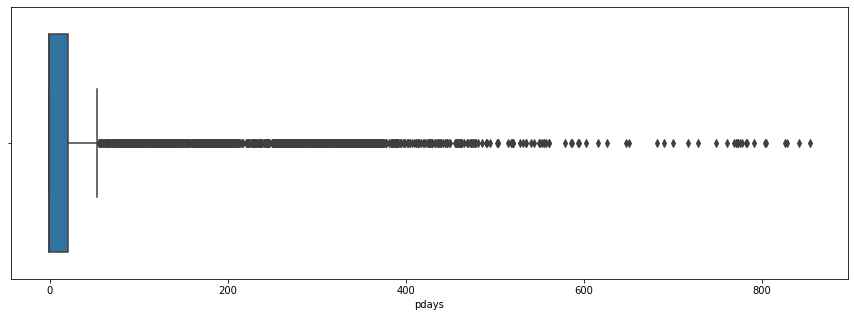

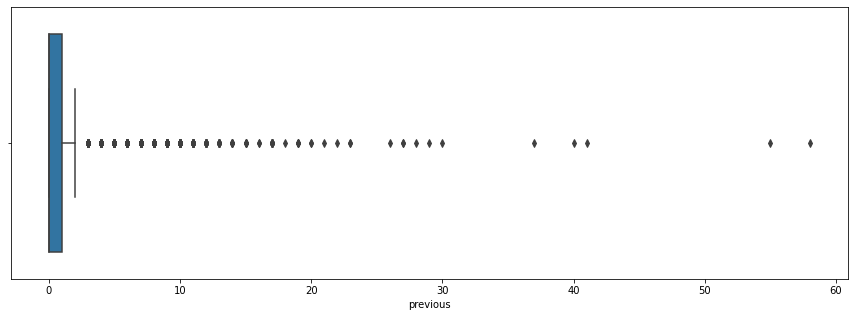

In [ ]:
# find the outliers in the numerical features
for feature in continuous_features:
    plt.figure(figsize=(15,5))
    sns.boxplot(bank[feature])
    plt.show()

Age, Balance, Duration, Campaign, pdays and previous have some outliers 

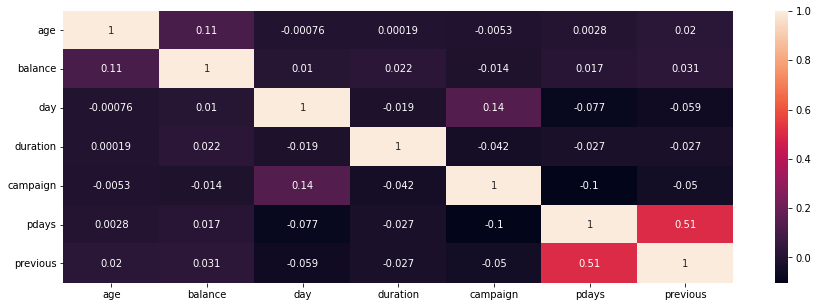

In [ ]:
# check the correlation between numerical features
plt.figure(figsize=(15,5))
sns.heatmap(bank.corr(), annot=True)
plt.show()

No strong correlation

In [ ]:
# check if the data is balance 
bank['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

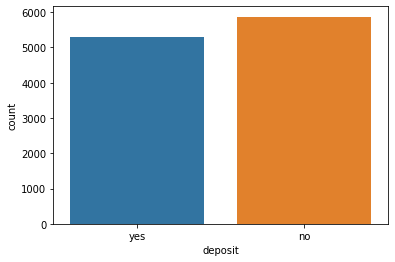

In [ ]:
sns.countplot(x='deposit',data=bank)
plt.show()

It seems that the target variable is balanced 

## **Handling Outliers**

We tried winsorising the outliers for Balance but it made our MVM worse. We believe most, if not all, of these outliers to be significant.

What we found so far 
- 0 missing values 
- 9 Categorical features 
- Outliers on Age, Balance, Duration, Campaign, pdays and previous

In [ ]:
# check pdays column
bank['pdays'].value_counts().sort_index()

-1      8324
 1         8
 2         8
 4         1
 5         2
        ... 
 805       1
 826       1
 828       1
 842       1
 854       1
Name: pdays, Length: 472, dtype: int64

-1 count for more than half of pday. Perhaps, it indicates that the client was not previously contacted. As this column will be scaled later, we will leave it as is.

Lets remove the outliers from Age, Balance, Duration, Campaign and Previous 

In [ ]:
# check previous column and order it by ascending
bank['previous'].value_counts().sort_index()

0     8324
1      887
2      693
3      435
4      244
5      165
6      117
7       77
8       60
9       34
10      30
11      23
12      16
13      11
14       6
15       5
16       2
17      11
18       1
19       4
20       2
21       1
22       1
23       2
26       1
27       2
28       1
29       1
30       1
37       1
40       1
41       1
55       1
58       1
Name: previous, dtype: int64

- We could say that 74% were people contacted for the first time since the number of previous is zero.
- On the other hand, our assumption about *pdays* is right, as we can see from *previous*. Thus, we leave it as is.

In [ ]:
bank.shape

(11162, 17)

In [ ]:
bank['balance'].value_counts().sort_index()

-6847     1
-3058     1
-2712     1
-2282     1
-2049     1
         ..
 51439    1
 52587    2
 56831    1
 66653    1
 81204    2
Name: balance, Length: 3805, dtype: int64

**Assumption:** If the client already has a negative balance, a campaign call is unlikely to make them deposit money.
If a client has a high balance, again they might be less likely to deposit following a campaign call.
Thus, we leave it as is.

In [ ]:
print(np.mean(bank['balance']))

1528.5385235620856


In [ ]:
bank['age'].value_counts().sort_index().T

18     8
19    13
20    20
21    30
22    48
      ..
89     1
90     2
92     2
93     2
95     1
Name: age, Length: 76, dtype: int64

In [ ]:
print(np.mean(bank['age']))

41.231947679627304


**Assumption:** Higher ages, perhaps those above retirement age, might be less likely to deposit following a campaign call. Thus, we leave *age* as is. 

# **Machine Learning Modelling**
 - Preparing: Feature transformation, RFE, Train-test split
 - MVM: Logistic Regression (with all features, and without RFE features)
 - Feature Engineering
 - MVM: After Feature Engineering
 - Decision Tree models
 - Random Forest models
 - Gradient Boosting technique
 - Model evaluation on test set and selection
 - Visualising results of selected model on test set

## **Preparing for ML Testing**

In [ ]:
df2 = bank.copy()

In [ ]:
px.pie(df2, names="deposit", template="none", title="A-priori probability of deposit")

#### Splitting the data into X and y, and dummy encoding X
*duration* is not considered as the duration of a call is not known before the actual call is made.
Also, it highly affects the target variable

In [ ]:
#Splitting the data into test and train
from sklearn.model_selection import train_test_split
X = df2.drop(['deposit', 'duration'], axis=1)
y = df2['deposit']

#Dummy encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
#Changing deposit to 0 and 1
y = y.map({'yes':1, 'no':0})

In [ ]:
X.dtypes

age                    int64
balance                int64
day                    int64
campaign               int64
pdays                  int64
previous               int64
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_married        uint8
marital_single         uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
default_yes            uint8
housing_yes            uint8
loan_yes               uint8
contact_telephone      uint8
contact_unknown        uint8
month_aug              uint8
month_dec              uint8
month_feb              uint8
month_jan              uint8
month_jul              uint8
month_jun              uint8
month_mar              uint8
month_may     

In [ ]:
#Extract numerical and categorical columns
cat_cols = X.select_dtypes(include=['object','uint8']).columns

In [ ]:
for i in cat_cols:
    X[i] = X[i].astype('object')

In [ ]:
X.dtypes

age                     int64
balance                 int64
day                     int64
campaign                int64
pdays                   int64
previous                int64
job_blue-collar        object
job_entrepreneur       object
job_housemaid          object
job_management         object
job_retired            object
job_self-employed      object
job_services           object
job_student            object
job_technician         object
job_unemployed         object
job_unknown            object
marital_married        object
marital_single         object
education_secondary    object
education_tertiary     object
education_unknown      object
default_yes            object
housing_yes            object
loan_yes               object
contact_telephone      object
contact_unknown        object
month_aug              object
month_dec              object
month_feb              object
month_jan              object
month_jul              object
month_jun              object
month_mar 

In [ ]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

#### Splitting data into train-test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Standard scaling numerical features in X

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train = pd.DataFrame(X_train, columns=X_train.columns)
X_train.head()

age   balance       day  campaign     pdays  previous  \
3955  -1.114041  1.346271 -0.666669  0.921804  1.374037  0.991722   
11150 -0.609278 -0.371778  0.635888  0.182456 -0.476209 -0.367601   
5173   0.568501 -0.420902 -0.666669 -0.556892  0.370670  0.085506   
3017   0.989136  0.140511 -0.074597 -0.556892 -0.476209 -0.367601   
2910   0.989136  0.033013 -0.548255  0.182456  0.425901  2.804154   

      job_blue-collar job_entrepreneur job_housemaid job_management  ...  \
3955                0                0             0              0  ...   
11150               0                0             0              1  ...   
5173                0                0             0              0  ...   
3017                0                1             0              0  ...   
2910                0                0             0              1  ...   

      month_jul month_jun month_mar month_may month_nov month_oct month_sep  \
3955          0         0         0         0         0         0         1   
11150         0         0         0         0         0         0         0   
5173          0         0         0         0         1         0         0   
3017          0         0         0         0         0         0         0   
2910          0         0         0         0         1         0         0   

      poutcome_other poutcome_success poutcome_unknown  
3955               0                0                0  
11150              0                0                1  
5173               0                1                0  
3017               0                0                1  
2910               0                1                0  

[5 rows x 41 columns]

In [ ]:
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test = pd.DataFrame(X_test, columns=X_test.columns)

## **[MVM] Logistic Regression**

In [ ]:
#Building the model
logreg = LogisticRegression(random_state=123,
                            solver='liblinear',
                            penalty='l2',
                            class_weight='balanced',
                            max_iter=1000,
                            C=1.0)
logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=123,
                   solver='liblinear')

In [ ]:
#Predicting the test data
y_pred = logreg.predict(X_test)

In [ ]:
#Evaluating the predictions
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7218987908643081

In [ ]:
#Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      1166
           1       0.75      0.62      0.68      1067

    accuracy                           0.72      2233
   macro avg       0.73      0.72      0.72      2233
weighted avg       0.73      0.72      0.72      2233



In [ ]:
#Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[946, 220],
       [401, 666]])

ROC-AUC score:  0.717750349242277


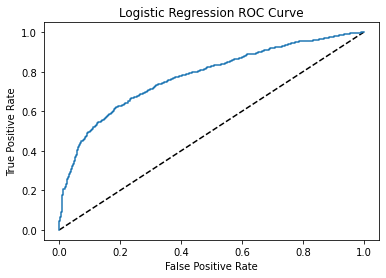

In [ ]:
#Plotting the ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
print("ROC-AUC score: ", roc_auc_score(y_test, y_pred))
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

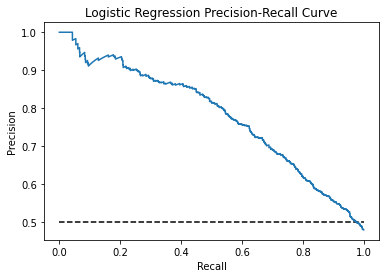

In [ ]:
#Plotting the precision recall curve
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
plt.plot([0,1], [0.5,0.5], 'k--')
plt.plot(recall, precision, label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Logistic Regression Precision-Recall Curve')
plt.show()

In [ ]:
#Cross validating the model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X_train, y_train, cv=10)
print('Cross-validation scores: {}'.format(scores))
print('Average cross-validation score: {:.2f}'.format(scores.mean()))

Cross-validation scores: [0.69540873 0.66965286 0.68868981 0.69540873 0.69428891 0.69764838
 0.71332587 0.69204927 0.70772676 0.6793722 ]
Average cross-validation score: 0.69


We see that our MVM is returning an acceptable mean cross-validation score.


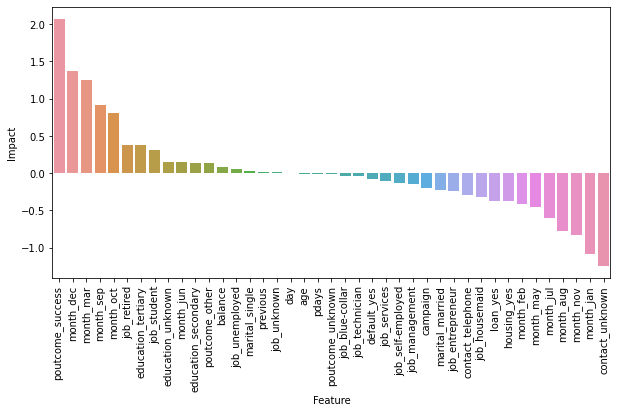

In [ ]:
#Impacts of features
feature_impacts = pd.DataFrame({'Feature': X.columns, 'Impact': logreg.coef_[0]})

#Plot feature impacts as waterfall plot
import seaborn as sns

fig = plt.figure(figsize=(10, 5))
sns.barplot(x='Feature', y='Impact', data=feature_impacts.sort_values(by='Impact', ascending=False))
plt.xticks(rotation=90)
plt.show()

The outcome of the previous campaign, the months of december, march, september and october, the jobs of retired and student and fillay the tertiary education level are the most important features for the model. 

## **Feature Engineering**

Ideas:

- Create new categorical variables with the combination of education and job. However this could give us a greater number of features 
- Categorize in Married or not
- Weekday or weekend. The biggest barrier is that we are missing information of the year so we cannot create this new feature.
- Build a categorical variable of new client considering new clients as the ones that have zero value on previous.

In [ ]:
dfe = bank.copy()

In [ ]:
# Combine education and job features. We assume that the education level is related to job therefore we create one feature that combine both categorical variables. 
dfe["jobedu_comb"] = (dfe.education.astype(str) + "_" + dfe.job.astype(str) )

# Remove individual features that are combined together
dfe = dfe.drop(['education','job'], axis=1)

In [ ]:
dfe['jobedu_comb'].value_counts() 

tertiary_management        2178
secondary_technician       1209
secondary_blue-collar      1116
secondary_admin.           1084
secondary_services          746
primary_blue-collar         694
tertiary_technician         521
secondary_retired           314
primary_retired             277
secondary_management        238
tertiary_self-employed      230
secondary_unemployed        210
secondary_student           189
tertiary_admin.             168
primary_housemaid           144
secondary_entrepreneur      141
tertiary_retired            140
secondary_self-employed     136
tertiary_entrepreneur       132
unknown_blue-collar          86
unknown_management           84
tertiary_unemployed          84
tertiary_student             83
primary_services             83
secondary_housemaid          78
unknown_student              67
primary_management           66
primary_unemployed           56
tertiary_services            53
unknown_technician           52
tertiary_blue-collar         48
unknown_

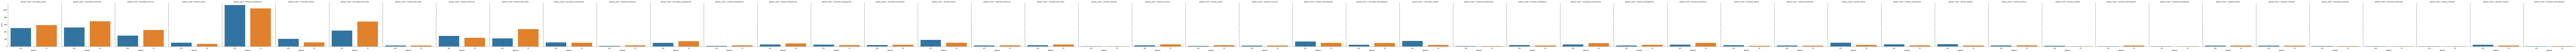

In [ ]:
sns.catplot(x='deposit', col='jobedu_comb', kind='count', data= dfe)

We see significant imbalances in categories with more than 250 records

In [ ]:
dfe.loc[dfe['jobedu_comb'].isin((dfe['jobedu_comb'].value_counts()[dfe['jobedu_comb'].value_counts() < 250]).index), 'jobedu_comb'] = 'jobedu_comb_others'

In [ ]:
dfe['jobedu_comb'].value_counts() 

jobedu_comb_others       3023
tertiary_management      2178
secondary_technician     1209
secondary_blue-collar    1116
secondary_admin.         1084
secondary_services        746
primary_blue-collar       694
tertiary_technician       521
secondary_retired         314
primary_retired           277
Name: jobedu_comb, dtype: int64

In [ ]:
#Convert marital status into two categories married or not
dfe['marital_status'] = dfe['marital'].where(dfe['marital'].eq('married'), 'single')

# Remove individual features that are combined together
dfe = dfe.drop('marital', axis=1)

In [ ]:
dfe['marital_status'].value_counts() 

married    6351
single     4811
Name: marital_status, dtype: int64

In [ ]:
# Build a new categorical variable that allow us to identify new clients. Our hypothesis is that a new client is the one that have zero value on previous.
def new(row):
    if row['previous']==0:
        return 1
    else:
        return 0

In [ ]:
dfe['new_customer'] = dfe.apply(lambda row: new(row), axis=1)

In [ ]:
dfe['new_customer'].value_counts()

1    8324
0    2838
Name: new_customer, dtype: int64

In [ ]:
dfe.head()

age default  balance housing loan  contact  day month  duration  campaign  \
0   59      no     2343     yes   no  unknown    5   may      1042         1   
1   56      no       45      no   no  unknown    5   may      1467         1   
2   41      no     1270     yes   no  unknown    5   may      1389         1   
3   55      no     2476     yes   no  unknown    5   may       579         1   
4   54      no      184      no   no  unknown    5   may       673         2   

   pdays  previous poutcome deposit           jobedu_comb marital_status  \
0     -1         0  unknown     yes      secondary_admin.        married   
1     -1         0  unknown     yes      secondary_admin.        married   
2     -1         0  unknown     yes  secondary_technician        married   
3     -1         0  unknown     yes    secondary_services        married   
4     -1         0  unknown     yes    jobedu_comb_others        married   

   new_customer  
0             1  
1             1  
2             1  
3             1  
4             1

#### **Preparing for ML Testing**

In [ ]:
df3 = dfe.copy()

##### Splitting the data into X and y, and dummy encoding X


In [ ]:
#Splitting the data into test and train
from sklearn.model_selection import train_test_split
X = df3.drop(['deposit', 'duration'], axis=1)
y = df3['deposit']

#Dummy encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
#Changing deposit to 0 and 1
y = y.map({'yes':1, 'no':0})

In [ ]:
#Extract numerical and categorical columns
cat_cols = X.select_dtypes(include=['object','uint8']).columns

In [ ]:
for i in cat_cols:
    X[i] = X[i].astype('object')

In [ ]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

##### Splitting data into train-test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

Standard scaling numerical features in X

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train = pd.DataFrame(X_train, columns=X_train.columns)
X_train.head()

age   balance       day  campaign     pdays  previous  \
3955  -1.114041  1.346271 -0.666669  0.921804  1.374037  0.991722   
11150 -0.609278 -0.371778  0.635888  0.182456 -0.476209 -0.367601   
5173   0.568501 -0.420902 -0.666669 -0.556892  0.370670  0.085506   
3017   0.989136  0.140511 -0.074597 -0.556892 -0.476209 -0.367601   
2910   0.989136  0.033013 -0.548255  0.182456  0.425901  2.804154   

       new_customer default_yes housing_yes loan_yes  ...  \
3955      -1.727022           0           0        0  ...   
11150      0.579031           0           0        0  ...   
5173      -1.727022           0           0        0  ...   
3017       0.579031           0           0        0  ...   
2910      -1.727022           0           0        0  ...   

      jobedu_comb_primary_blue-collar jobedu_comb_primary_retired  \
3955                                0                           0   
11150                               0                           0   
5173                                0                           0   
3017                                0                           0   
2910                                0                           0   

      jobedu_comb_secondary_admin. jobedu_comb_secondary_blue-collar  \
3955                             0                                 0   
11150                            0                                 0   
5173                             0                                 0   
3017                             0                                 0   
2910                             0                                 0   

      jobedu_comb_secondary_retired jobedu_comb_secondary_services  \
3955                              0                              0   
11150                             0                              0   
5173                              0                              0   
3017                              0                              0   
2910                              0                              0   

      jobedu_comb_secondary_technician jobedu_comb_tertiary_management  \
3955                                 0                               0   
11150                                0                               0   
5173                                 0                               0   
3017                                 0                               0   
2910                                 0                               1   

      jobedu_comb_tertiary_technician marital_status_single  
3955                                0                     1  
11150                               0                     0  
5173                                0                     1  
3017                                0                     0  
2910                                0                     0  

[5 rows x 36 columns]

In [ ]:
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test = pd.DataFrame(X_test, columns=X_test.columns)

As we know Loggistic regression is limited to run with a large number of features therefore we decided to test models only with important features by using the Recursive Feature Selection Method.

## **Recursive Feature Selection**

In [ ]:
#Recursive Feature Selection 

NUM_FEATURES = 5

rfe_stand = RFE(logreg, step=NUM_FEATURES)

In [ ]:
fit_stand = rfe_stand.fit(X_train, y_train)

print("Std Model Feature Ranking:", fit_stand.ranking_)

# calculate the score for the selected features
score_stand = rfe_stand.score(X,y)
print("Standardized Model Score with selected features is: %f (%f)" % (score_stand.mean(), score_stand.std()))

Std Model Feature Ranking: [4 4 5 3 5 5 1 4 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 3 1 1 3 2 5 5 1 3 4 4 2 2]
Standardized Model Score with selected features is: 0.693782 (0.000000)


In [ ]:
train_names = np.array(X_train.columns)
print('Most important features (RFE): %s'% train_names[rfe_stand.support_])

Most important features (RFE): ['new_customer' 'housing_yes' 'loan_yes' 'contact_telephone'
 'contact_unknown' 'month_aug' 'month_dec' 'month_feb' 'month_jan'
 'month_jul' 'month_mar' 'month_may' 'month_nov' 'month_oct' 'month_sep'
 'poutcome_success' 'poutcome_unknown' 'jobedu_comb_secondary_retired']


In [ ]:
X_imp = X_train[train_names[rfe_stand.support_]]

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

Implementing the concept of stratified sampling in cross-validation ensures the training and test sets have the same proportion of the feature of interest as in the original dataset. Doing this with the target variable ensures that the cross-validation result is a close approximation of generalization error.

## **[MVM] Logistic Regression: Most Important Features**

In [ ]:
#Building the model
logreg_fe = LogisticRegression(random_state=123,
                            solver='liblinear',
                            penalty='l2',
                            class_weight='balanced',
                            max_iter=1000,
                            C=1.0)

#Fit model
logreg_fe.fit(X_imp, y_train)
print("Accuracy of training set: {:.3f}".format(logreg_fe.score(X_imp, y_train)))


#Cross validate
scores = cross_val_score(logreg_fe, X_imp, y_train, cv=cv)
print('Mean cross-val accuracy: ', scores.mean())

Accuracy of training set: 0.694
Mean cross-val accuracy:  0.6928734033346892


The results of the model are similar to our MVM without Feature Engineering. Except that the accuracy is better in the first loggistic regression model. 


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 5527 to 6786
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   age                                2233 non-null   float64
 1   balance                            2233 non-null   float64
 2   day                                2233 non-null   float64
 3   campaign                           2233 non-null   float64
 4   pdays                              2233 non-null   float64
 5   previous                           2233 non-null   float64
 6   new_customer                       2233 non-null   float64
 7   default_yes                        2233 non-null   object 
 8   housing_yes                        2233 non-null   object 
 9   loan_yes                           2233 non-null   object 
 10  contact_telephone                  2233 non-null   object 
 11  contact_unknown                    2233 non-null   ob

In [ ]:
X_test_imp = X_test[train_names[rfe_stand.support_]]

y_pred_prob_lrfe = logreg_fe.predict_proba(X_test_imp)[:, 1]
print("AUC: {:.3f}".format(roc_auc_score(y_test, y_pred_prob_lrfe)))

AUC: 0.752


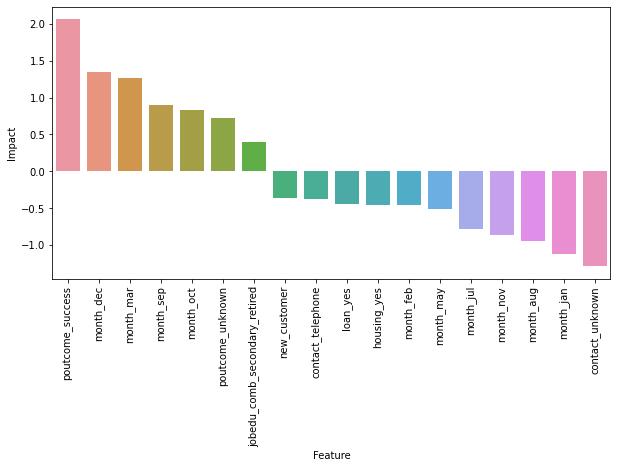

In [ ]:
#Impacts of features
feature_impacts = pd.DataFrame({'Feature': X_imp.columns, 'Impact': logreg_fe.coef_[0]})

#Plot feature impacts as waterfall plot
fig = plt.figure(figsize=(10, 5))
sns.barplot(x='Feature', y='Impact', data=feature_impacts.sort_values(by='Impact', ascending=False))
plt.xticks(rotation=90)
plt.show()

## **Model 1: K-Nearest Neighbours**

In [ ]:
#Create the model
knn = KNeighborsClassifier(n_neighbors=8)

#Fit model
knn.fit(X_train, y_train)
print("Accuracy of training set: {:.3f}".format(knn.score(X_train, y_train)))

#Cross validate
scores = cross_val_score(knn, X_train, y_train, cv=cv)
print('Mean cross-val accuracy: ', scores.mean())


Accuracy of training set: 0.752
Mean cross-val accuracy:  0.6994440650333017


In [ ]:
#Finding the best value for K for our model, using cross validation

tuned_parameters = [{'n_neighbors': [3,5,7,9,11,13,15,17,19]}]
knn_tun= GridSearchCV(knn, tuned_parameters, 
                   cv=cv, scoring='f1_micro')
knn_tun.fit(X_train,y_train)
print("Best parameters set found on development set:")
print(' ->', knn_tun.best_params_)

y_true, y_pred = y_test, knn_tun.predict(X_test)
print("\n",classification_report(y_true, y_pred))

Best parameters set found on development set:
 -> {'n_neighbors': 19}

               precision    recall  f1-score   support

           0       0.69      0.84      0.76      1166
           1       0.77      0.59      0.67      1067

    accuracy                           0.72      2233
   macro avg       0.73      0.71      0.71      2233
weighted avg       0.73      0.72      0.71      2233



<em>Cross-validation takes almost 30 mins to run. Run Cell [247] directly</em>

In [ ]:
print("Accuracy of training set: {:.3f}".format(knn_tun.score(X_train, y_train)))

#Cross validate
scores = cross_val_score(knn_tun, X_train, y_train, cv=cv)
print('Mean cross-val accuracy: ', scores.mean())

Accuracy of training set: 0.738
Mean cross-val accuracy:  0.7092989904873815


Through cross validation we achieved to improve the cross validated accuracy. We can explore if tuning the metric of distance calculation could help us improve the model.

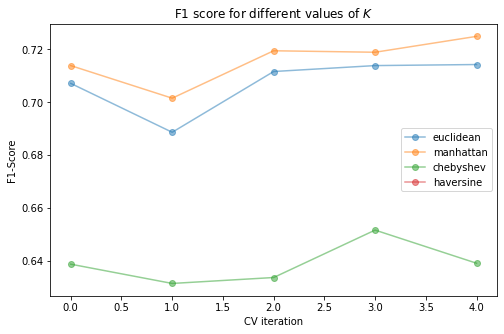

In [ ]:
f1 = []
metrics = ['euclidean','manhattan','chebyshev','haversine']
for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=19, n_jobs=-1, metric=metric)
    score = cross_val_score(knn, X_train, y_train, scoring='f1_micro', cv=5)
    f1.append(score)
f1_means = np.mean(np.array(f1), axis=1)

max_y1 = np.array(f1).max()
max_y2 = f1_means.max()
max_y = max(max_y1, max_y2)

min_y1 = np.array(f1).min()
min_y2 = f1_means.min()
min_y = min(min_y1, min_y2)

plt.figure(figsize=(8,5))
for i in range(len(metrics)):
    plt.plot(f1[i], 'o-', label=metrics[i], alpha=0.5)
plt.title('F1 score for different values of $K$')
plt.xlabel('CV iteration')
plt.ylabel('F1-Score')
plt.legend(loc='best')
plt.show();

In [ ]:
#Create the model considering the best k and distance metric 
knn = KNeighborsClassifier(n_neighbors=19, metric='manhattan')

#Fit model
knn.fit(X_train, y_train)
print("Accuracy of training set: {:.3f}".format(knn.score(X_train, y_train)))

#Cross validate
scores = cross_val_score(knn, X_train, y_train, cv=cv)
print('Mean cross-val accuracy: ', scores.mean())


Accuracy of training set: 0.743
Mean cross-val accuracy:  0.7176614492054961


As we can remember, Manhattan is another distance measure consider for numerical mixable features. Thanks to this tuning and the optimum number of k we improved the performance of the model in the training set and validation. 

## **Model 2: Decision Tree**

In [ ]:
#Create model
dt = DecisionTreeClassifier(random_state=42)

#Fit model
dt.fit(X_test, y_test)
print("Accuracy of training set: {:.3f}".format(dt.score(X_train, y_train)))

#Cross validate
scores = cross_val_score(dt, X_train, y_train, cv=cv)
print('Mean cross-val accuracy: ', scores.mean())

Accuracy of training set: 0.610
Mean cross-val accuracy:  0.6422891380727365


In [ ]:
y_pred_prob_dt = dt.predict_proba(X_test)[:, 1]
print("Accuracy of test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy of test set: 1.000


The model is overfitting the test data

In [ ]:
#Depth of current tree
print('Depth of current tree: ', dt.get_depth())

#Current number of leaves
print('Current number of leaves: ', dt.get_n_leaves())

Depth of current tree:  27
Current number of leaves:  556


## **Model 3: Decision Tree: Most Important Features**

In [ ]:
#Recursive Feature Selection 

NUM_FEATURES = 5

rfe_stand = RFE(dt, step=NUM_FEATURES)

In [ ]:
fit_stand = rfe_stand.fit(X_train, y_train)

print("Std Model Feature Ranking:", fit_stand.ranking_)

# calculate the score for the selected features
score_stand = rfe_stand.score(X_train,y_train)
print("Standardized Model Score with selected features is: %f (%f)" % (score_stand.mean(), score_stand.std()))

Std Model Feature Ranking: [1 1 1 1 1 1 4 5 1 1 3 1 1 5 3 3 1 3 4 2 1 4 5 4 1 5 2 5 1 1 4 2 1 1 3 1]
Standardized Model Score with selected features is: 1.000000 (0.000000)


In [ ]:
train_names = np.array(X_train.columns)
print('Most important features (RFE): %s'% train_names[rfe_stand.support_])

Most important features (RFE): ['age' 'balance' 'day' 'campaign' 'pdays' 'previous' 'housing_yes'
 'loan_yes' 'contact_unknown' 'month_aug' 'month_jul' 'month_nov'
 'poutcome_success' 'jobedu_comb_secondary_admin.'
 'jobedu_comb_secondary_blue-collar' 'jobedu_comb_secondary_technician'
 'jobedu_comb_tertiary_management' 'marital_status_single']


In [ ]:
X_imp = X_train[train_names[rfe_stand.support_]]

In [ ]:
dt_imp = DecisionTreeClassifier(random_state=42)

#Fit model
dt_imp.fit(X_imp, y_train)
print("Accuracy of training set: {:.3f}".format(dt_imp.score(X_imp, y_train)))

#Cross validate
scores = cross_val_score(dt_imp, X_imp, y_train, cv=cv)
print('Mean cross-val accuracy: ', scores.mean())

Accuracy of training set: 1.000
Mean cross-val accuracy:  0.625938749650579


Overfitting, yet again, as we can see from the difference in scores

In [ ]:
X_test_imp = X_test[train_names[rfe_stand.support_]]

y_pred_prob_dtimp = dt_imp.predict_proba(X_test_imp)[:, 1]
print("Accuracy of test set: {:.3f}".format(dt_imp.score(X_test_imp, y_test)))

Accuracy of test set: 0.628


In [ ]:
#Depth of current tree
print('Depth of current tree: ', dt_imp.get_depth())

#Current number of leaves
print('Current number of leaves: ', dt_imp.get_n_leaves())

Depth of current tree:  39
Current number of leaves:  2378


## **Model 4: Hyperparameter Tuning of Decision Tree**

Usually model seletion is done before hyperparameter tuning for process efficiency but we wanted to attempt hyperparameter tuning beforehand to understand the difference it would make w.r.t the training set

Using GridSearch for hyperparameter tuning of Model 1

In [ ]:
#Create parameter grid
param_grid = {'max_depth': range(1, 40, 2)}

#Create grid search object: 
grid_search = GridSearchCV(dt, param_grid, cv=cv, return_train_score=True)

#Fit grid search
grid_search.fit(X_train, y_train)

#Best parameters
print('Best parameters: ', grid_search.best_params_)

Best parameters:  {'max_depth': 9}


Checking how depth of the tree impacts score

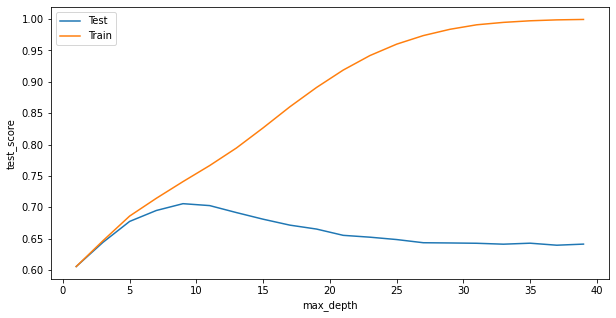

In [ ]:
#ROC_AUC score for different values of max_depth
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_max_depth', 'mean_test_score', 'mean_train_score']]
results.columns = ['max_depth', 'test_score', 'train_score']

#Plot ROC_AUC score for different values of max_depth
fig = plt.figure(figsize=(10, 5))
sns.lineplot(x='max_depth', y='test_score', data=results, label='Test')
sns.lineplot(x='max_depth', y='train_score', data=results, label='Train')
plt.show()

In [ ]:
#Create model with best parameters
dt_pruned = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'], random_state=42)

#Fit model
dt_pruned.fit(X_train, y_train)
print("Accuracy of training set: {:.3f}".format(dt_pruned.score(X_train, y_train)))

#Cross validate
scores = cross_val_score(dt_pruned, X_train, y_train, cv=cv)
print('Mean cross-val Accuracy: ', scores.mean())

Accuracy of training set: 0.745
Mean cross-val Accuracy:  0.705679157104669


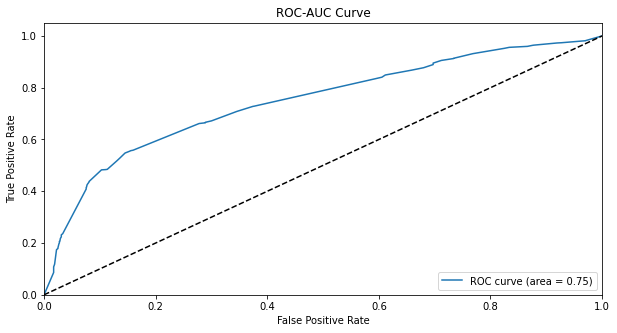

In [ ]:
y_pred_prob_dtp = dt_pruned.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_dtp)

roc_auc = auc(fpr, tpr)

#Plot ROC-AUC curve
fig = plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred_prob_dtp = dt_pruned.predict_proba(X_test)[:, 1]
print("AUC: {:.3f}".format(roc_auc_score(y_test, y_pred_prob_dtp)))

AUC: 0.747


In [ ]:
thresholds = np.linspace(0,1,1000)

precs = []
recs = []
for th in thresholds:
    precs.append(precision_score(y_test, y_pred_prob_dtp > th))
    recs.append(recall_score(y_test, y_pred_prob_dtp > th))

#Plot Precision-Recall curve
fig = go.Figure()
fig.add_trace(go.Scatter(x=thresholds, y=precs, name='Precision'))
fig.add_trace(go.Scatter(x=thresholds, y=recs, name='Recall'))
fig.update_layout(title='Precision-Recall Curve', xaxis_title='Threshold', yaxis_title='Score')
fig.show()

## **Model 5: Random Forest**

In [ ]:
#Create model
rf = RandomForestClassifier(random_state=42, max_features=len(X_train.columns))

#Fit model
rf.fit(X_train, y_train)
print("Accuracy of training set: {:.3f}".format(rf.score(X_train, y_train)))

#Cross validate
scores = cross_val_score(rf, X_train, y_train, cv=cv)
print('Mean cross-val accuracy: ', scores.mean())

Accuracy of training set: 1.000
Mean cross-val accuracy:  0.7202376229668723


In [ ]:
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]
print("Accuracy of test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy of test set: 0.721


In [ ]:
#Tree depth
tree_depths = []
for tree in rf.estimators_:
    tree_depths.append(tree.tree_.max_depth)

#Plot tree depth
fig = go.Figure()
fig.add_trace(go.Histogram(x=tree_depths, name='Tree Depth'))
fig.update_layout(title='Tree Depth', xaxis_title='Depth', yaxis_title='Count')
fig.show()

Much better model performance compared to decision tree

## **Model 6: Hyperparameter Tuning of Random Forest**

In [ ]:
#Create parameter grid
param_grid = {'max_features': [range(1,len(X_train.columns)), 'sqrt'], 'max_depth': range(1, 50, 5)}

#Create grid search object
grid_search = GridSearchCV(rf, param_grid, cv=cv, return_train_score=True)

#Fit grid search
grid_search.fit(X_train, y_train)   

#Best parameters
print('Best parameters: ', grid_search.best_params_)

Best parameters:  {'max_depth': 16, 'max_features': 'sqrt'}


In [ ]:
#Create model with best parameters
rf_pruned = RandomForestClassifier(random_state=42, max_features=grid_search.best_params_['max_features'], max_depth=grid_search.best_params_['max_depth'])

#Fit model
rf_pruned.fit(X_train, y_train)
print("Accuracy of training set: {:.3f}".format(rf_pruned.score(X_train, y_train)))

#Cross validate
scores = cross_val_score(rf_pruned, X_train, y_train, cv=cv)
print('Mean cross-val accuracy: ', scores.mean())

Accuracy of training set: 0.892
Mean cross-val accuracy:  0.7343109586771049


There's still a degree of overfitting but that's still much better than what we were seeing for decision trees

In [ ]:
y_pred_prob_rfp = rf_pruned.predict_proba(X_test)[:, 1]
print("Accuracy of test set: {:.3f}".format(rf_pruned.score(X_test, y_test)))

Accuracy of test set: 0.746


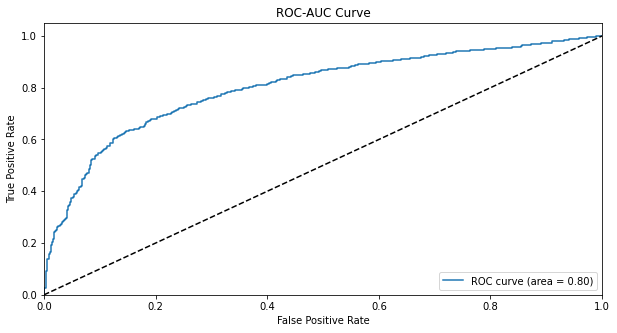

AUC: 0.801


In [ ]:
y_pred_prob_rfp = rf_pruned.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rfp)

roc_auc = auc(fpr, tpr)

#Plot ROC-AUC curve
fig = plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC: {:.3f}".format(roc_auc_score(y_test, y_pred_prob_rfp)))

In [ ]:
thresholds = np.linspace(0,1,1000)

precs = []
recs = []
for th in thresholds:
    precs.append(precision_score(y_test, y_pred_prob_rfp > th))
    recs.append(recall_score(y_test, y_pred_prob_rfp > th))

#Plot Precision-Recall curve
fig = go.Figure()
fig.add_trace(go.Scatter(x=thresholds, y=precs, name='Precision'))
fig.add_trace(go.Scatter(x=thresholds, y=recs, name='Recall'))
fig.update_layout(title='Precision-Recall Curve', xaxis_title='Threshold', yaxis_title='Score')
fig.show()

print("Precision: {:.3f}".format(precision_score(y_test, y_pred_prob_rfp > 0.5)))
print("Recall: {:.3f}".format(recall_score(y_test, y_pred_prob_rfp > 0.5)))
print("F1 Score: {:.3f}".format(f1_score(y_test, y_pred_prob_rfp > 0.5)))

Precision: 0.803
Recall: 0.619
F1 Score: 0.699


## **Model 7: Gradient Boosting**

In [ ]:
gb = GradientBoostingClassifier(random_state=42)

gb.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gb.score(X_train, y_train)))

#Cross validate
scores = cross_val_score(gb, X_train, y_train, cv=cv)
print('Mean cross-val accuracy: ', scores.mean())

Accuracy on training set: 0.748
Mean cross-val accuracy:  0.7323321063846524


Gradient boosting is fixing the overfitting problem

In [ ]:
y_pred_prob_gb = gb.predict_proba(X_test)[:, 1]
print("Accuracy on test set: {:.3f}".format(gb.score(X_test, y_test)))

Accuracy on test set: 0.742


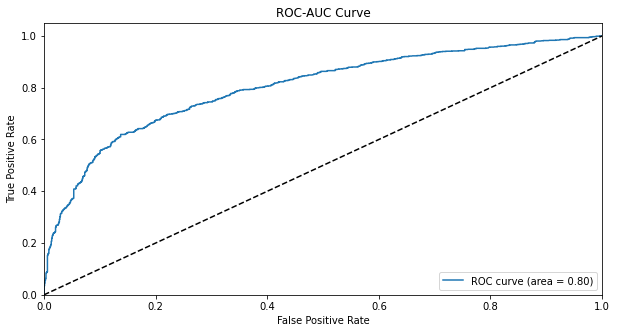

AUC: 0.802


In [ ]:
y_pred_prob_rfp = gb.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rfp)

roc_auc = auc(fpr, tpr)

#Plot ROC-AUC curve
fig = plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC: {:.3f}".format(roc_auc_score(y_test, y_pred_prob_rfp)))

In [ ]:
thresholds = np.linspace(0,1,1000)

precs = []
recs = []
for th in thresholds:
    precs.append(precision_score(y_test, y_pred_prob_rfp > th))
    recs.append(recall_score(y_test, y_pred_prob_rfp > th))

#Plot Precision-Recall curve
fig = go.Figure()
fig.add_trace(go.Scatter(x=thresholds, y=precs, name='Precision'))
fig.add_trace(go.Scatter(x=thresholds, y=recs, name='Recall'))
fig.update_layout(title='Precision-Recall Curve', xaxis_title='Threshold', yaxis_title='Score')
fig.show()

print("Precision: {:.3f}".format(precision_score(y_test, y_pred_prob_rfp > 0.5)))
print("Recall: {:.3f}".format(recall_score(y_test, y_pred_prob_rfp > 0.5)))
print("F1 Score: {:.3f}".format(f1_score(y_test, y_pred_prob_rfp > 0.5)))

Precision: 0.809
Recall: 0.603
F1 Score: 0.691


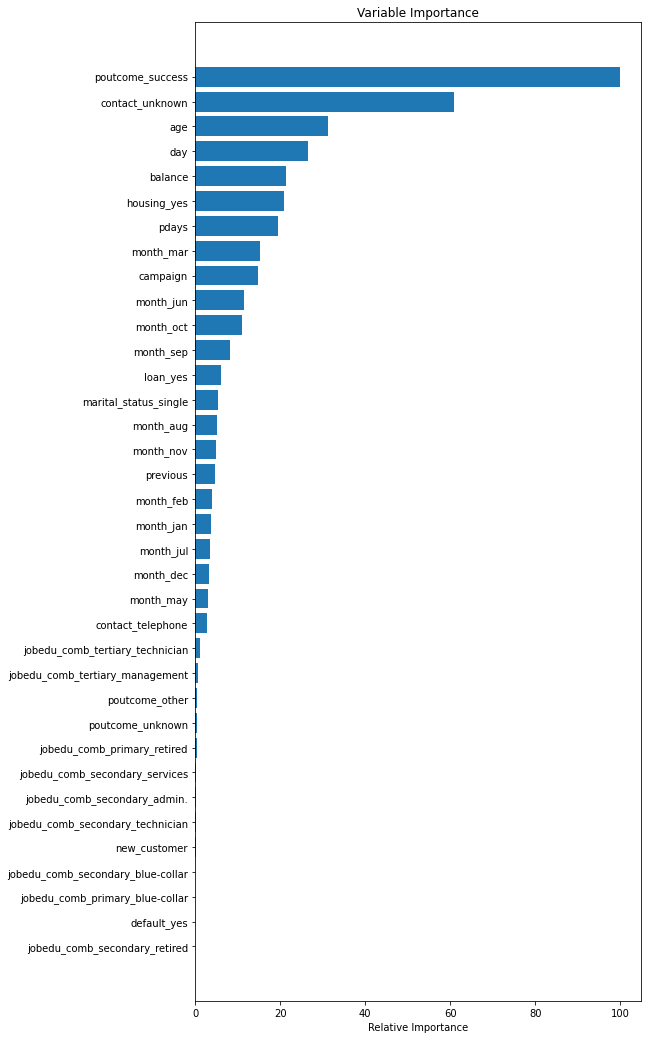

In [ ]:
# Plot feature importance https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
#sklearn.svm.SVR
feature_importance = gb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5# 
plt.figure(figsize=(8, 18))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## **Testing the Models and Model Selection**
This will help us compare model performance on the test set

In [ ]:
dfs = []

models1 = [
          ('LogReg', logreg),
          ('KNN',knn),
          #('Model 0b: LogReg (Important Features)', logreg_imp),
          ('DT', dt),
          #('Model 2: Decision Tree (Important Features)', dt_imp),
          ('Pruned DT', dt_pruned),
          ('RF', rf),
          ('Pruned RF', rf_pruned),
          ('GB', gb)
        ]

results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['Non-Default','Default']

for name, model in models1:
    cv_results = model_selection.cross_validate(model, X_train, y_train, cv=cv, scoring=scoring)
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names))
    results.append(cv_results)
    names.append(name)
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)

final = pd.concat(dfs, ignore_index=True)

LogReg
              precision    recall  f1-score   support

 Non-Default       0.69      0.79      0.74      1166
     Default       0.73      0.62      0.67      1067

    accuracy                           0.71      2233
   macro avg       0.71      0.70      0.70      2233
weighted avg       0.71      0.71      0.70      2233

KNN
              precision    recall  f1-score   support

 Non-Default       0.69      0.86      0.77      1166
     Default       0.79      0.58      0.67      1067

    accuracy                           0.73      2233
   macro avg       0.74      0.72      0.72      2233
weighted avg       0.74      0.73      0.72      2233

DT
              precision    recall  f1-score   support

 Non-Default       0.65      0.66      0.66      1166
     Default       0.63      0.61      0.62      1067

    accuracy                           0.64      2233
   macro avg       0.64      0.64      0.64      2233
weighted avg       0.64      0.64      0.64      2233

Prune

In [ ]:
bootstraps = []

for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)

bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics

# PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

# TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

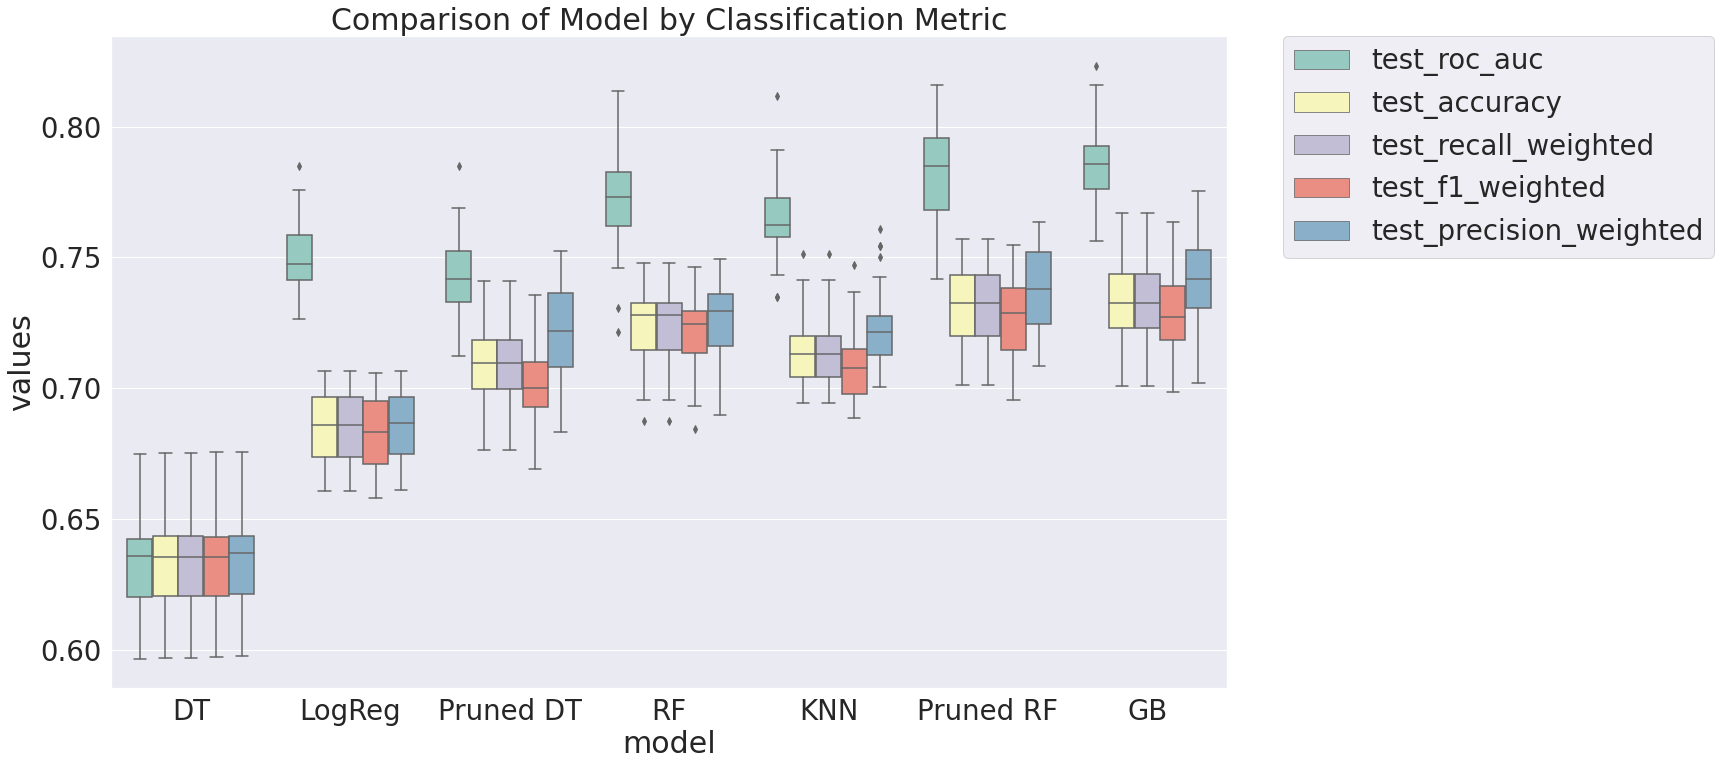

In [ ]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

In [ ]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_accuracy           test_roc_auc           test_f1_weighted  \
                    std      mean          std      mean              std   
model                                                                       
DT             0.019075  0.634511     0.019096  0.633862         0.019031   
GB             0.015608  0.734007     0.016273  0.786838         0.015703   
KNN            0.013966  0.714702     0.017776  0.764400         0.014316   
LogReg         0.013222  0.685271     0.015028  0.748884         0.013552   
Pruned DT      0.014455  0.707546     0.017745  0.741279         0.014948   
Pruned RF      0.016044  0.730643     0.021346  0.780674         0.016662   
RF             0.015154  0.723915     0.020746  0.772559         0.015344   

                    test_recall_weighted           test_precision_weighted  \
               mean                  std      mean                     std   
model                                                                        
DT         0.634518             0.019075  0.634511                0.019094   
GB         0.729656             0.015608  0.734007                0.016694   
KNN        0.708767             0.013966  0.714702                0.015234   
LogReg     0.683172             0.013222  0.685271                0.013240   
Pruned DT  0.699260             0.014455  0.707546                0.016915   
Pruned RF  0.726437             0.016044  0.730643                0.016320   
RF         0.721432             0.015154  0.723915                0.015560   

                     
               mean  
model                
DT         0.635061  
GB         0.741433  
KNN        0.723759  
LogReg     0.685900  
Pruned DT  0.721177  
Pruned RF  0.737290  
RF         0.726481

**Gradient Boosting outperforms all other models** with a mean ROC-AUC of 78.68% and accuracy of 73.40%

We will be avoiding running a hyperparameter tuning of the Gradient Boost model as it is computationally intensive. However, if implemented, there are high chances of it being the best performing model

#### Saving the models (optional)

In [ ]:
filename = 'logreg.sav'
pickle.dump(logreg, open(filename, 'wb'))

filename = 'logreg_fe.sav'
pickle.dump(logreg_fe, open(filename, 'wb'))

filename = 'knn.sav'
pickle.dump(knn, open(filename, 'wb'))

filename = 'dt.sav'
pickle.dump(dt, open(filename, 'wb'))

filename = 'dt_imp.sav'
pickle.dump(dt_imp, open(filename, 'wb'))

filename = 'dt_pruned.sav'
pickle.dump(dt_pruned, open(filename, 'wb'))

filename = 'rf.sav'
pickle.dump(rf, open(filename, 'wb'))

filename = 'rf_pruned.sav'
pickle.dump(rf_pruned, open(filename, 'wb'))

filename = 'gb.sav'
pickle.dump(gb, open(filename, 'wb'))

## **Visualising the final model on the test set using <em>bctools</em>**
This will allow us to visualise the model's performance by changing the threshold

In [ ]:
y_test_pred = rf_pruned.predict(X_test)
y_test_pred_proba = rf_pruned.predict_proba(X_test)[:, 1]

In [ ]:
threshold_step = 0.05

In [ ]:
var_metrics_df, invar_metrics_df, opt_metrics_df= bc.confusion_matrix_plot(
    true_y = y_test,
    predicted_proba = y_test_pred_proba,
    threshold_step = threshold_step,
    #N_subsets = 70, subsets_size = 0.2, # default
    #with_replacement = False,           # default
    random_state = 123,
    title = 'Interactive Confusion Matrix for the Test Set')

In [ ]:
area_under_ROC = bc.curve_ROC_plot(true_y= y_test, 
                                   predicted_proba = y_test_pred_proba)

In [ ]:
area_under_PR = bc.curve_PR_plot(true_y= y_test, 
                                 predicted_proba = y_test_pred_proba, 
                                 beta = 1)

In [ ]:
threshold_step = 0.05

bc.predicted_proba_violin_plot(true_y = y_test, 
                               predicted_proba = y_test_pred_proba, 
                               threshold_step = threshold_step)

In [ ]:
threshold_step = 0.05
curve_type = 'kde' #'kde' is the default value, can also be set to 'normal'

bc.predicted_proba_density_curve_plot(true_y = y_test, 
                                      predicted_proba = y_test_pred_proba, 
                                      threshold_step = threshold_step,
                                      curve_type = curve_type)

# **Summary and Explanation**


## **Most relevant insights from the EDA**

- The ***most active months of the campaign were from April to August***. May being the month with the highest records.
- When the ***outcome of the previous campaign is successful***, more people deposit.
- The housing feature seems to give information about the deposit as ***with the presence of a housing loan less people deposit***.
- From an educational level perspective, ***more people from tertiary education did a deposit*** in comparison to the rest.
- The proportion of ***single people*** that made a deposit is greater vs the total.
- ***Management,retired and students*** have a greater proportion of people who deposit.   
-***April,March, September, October and December*** show a high interest in deposits.

## **Model development:**

1. ***Logistic regression MVM*** --> We started with this simple statistic model to create our minimum viable model. Our starting point with all the current features got an accuracy for the training of 72% and an average cross-validation score of 69%.  
2. ***Feature engineering and Logistic regression***--> We create new features by combining education and job, simplifying marital status and creating a new customer variable. As we know some of the challenges of using logistic regression is the number of features the model can handdle therefore we applied a recursive feature selection expecting to improve the  results of the MVM. Since the accuracy is slightly better, we run the rest of the models considering the Feature Engineering.
3.***K-Means***--> Our next model was this Instance-Based Classifier. Since we got better results compared to the Logistic Regression (74% Accuracy and 0.72 Cross-Validation Score ) , our hypothesis is that we are dealing with a non-linear decision boundary. A challenge with this model was that the cross-validation time was around 30 min. 
4. ***Decision Tree*** --> We did this model with the main intention of obtaining explainability however after runnig the model we got an overfit result. In order to solve this problem we did a hyperparameter tuning on the max depth which helps us to improved from 0.642 to 0.705 mean cross-val accuracy.
5. ***Random forest*** --> We keep improving the accuracy to 72% through a random forest model. As we know Random Forest allows us to reduce the error by training several trees with the condition that each predictor is trained with a subsample of the total training data. After tuning the model to also deal with overfitting we obtained 0.73 mean cross-val accuracy. 
6. Finally ***Gradient Boosting*** also helps us to fix the overfitting problem but the results were not better that Random Forest (Mean cross-val 0.73, AUC 74%).

## ***Model comparison and selection***

After testing our models with the test sample, we select the **Gradient Boosting model** as it outperforms all other models.

Interpretation Gradient Boosting model for the business:

*   ***Most important features***: previous outcome of succes, unkown contact, age, day balance, the presence of a housing loan and previous days are the most important features to predict deposit in our model.
*   ***Accuracy***: Overall, our model is predicting the correct class in 73% of the cases.
*   ***Precision***: In 16% of the cases we are including false predictions of 
the positive class.
*   ***AUC-ROC***: 78.7%

Gradient Boosting and Hyperparameter Tuned Random Forest got the best results.We will be avoiding running a hyperparameter tuning of the Gradient Boost model as it is computationally intensive. However, if implemented, there are high chances of it being the best performing model


In [ ]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_accuracy           test_roc_auc           test_f1_weighted  \
                    std      mean          std      mean              std   
model                                                                       
DT             0.019075  0.634511     0.019096  0.633862         0.019031   
GB             0.015608  0.734007     0.016273  0.786838         0.015703   
KNN            0.013966  0.714702     0.017776  0.764400         0.014316   
LogReg         0.013222  0.685271     0.015028  0.748884         0.013552   
Pruned DT      0.014455  0.707546     0.017745  0.741279         0.014948   
Pruned RF      0.016044  0.730643     0.021346  0.780674         0.016662   
RF             0.015154  0.723915     0.020746  0.772559         0.015344   

                    test_recall_weighted           test_precision_weighted  \
               mean                  std      mean                     std   
model                                                                        
DT         0.634518             0.019075  0.634511                0.019094   
GB         0.729656             0.015608  0.734007                0.016694   
KNN        0.708767             0.013966  0.714702                0.015234   
LogReg     0.683172             0.013222  0.685271                0.013240   
Pruned DT  0.699260             0.014455  0.707546                0.016915   
Pruned RF  0.726437             0.016044  0.730643                0.016320   
RF         0.721432             0.015154  0.723915                0.015560   

                     
               mean  
model                
DT         0.635061  
GB         0.741433  
KNN        0.723759  
LogReg     0.685900  
Pruned DT  0.721177  
Pruned RF  0.737290  
RF         0.726481

## **Final Recommendation**

At a threshold of 0.5, the model is able to correctly classify most of the clients who do not make a deposit. This information is helpful for the bank to decide whether they want to attempt a different campaign to target this clientele or not spend any resources on this group.
However, since every bank has a different requirement for building such a predictive classifier, it is possible that the bank would rather correctly identify those **who will be making a deposit**. In order to this, the threshold for our classification model would only need to be reduced from 0.5. 
However, this would decrease the number of correct true negative (those who won't make a deposit) classifications.